In [1]:
#import all the packages and set plots to be embedded inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
## Load the data and assign columns
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
drivers = pd.read_csv('drivers.csv')
constructors = pd.read_csv('constructors.csv')

In [3]:
## Merge the datasets to one

df = pd.merge(results, races[['raceId', 'year','name','round']], on = 'raceId', how = 'left') 
df = pd.merge(df, drivers[['driverId', 'driverRef','nationality']], on = 'driverId', how = 'left')
df = pd.merge(df, constructors[['constructorId', 'name', 'nationality']], on = 'constructorId', how = 'left')

In [6]:
## Dropping some columns
df.drop(['number', 'position','positionText','laps','fastestLap','statusId','resultId','raceId', 'driverId','constructorId'], axis = 1, inplace = True)

In [7]:
df.head()

,grid,positionOrder,points,time,milliseconds,rank,fastestLapTime,fastestLapSpeed,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [9]:
#Rename the columns
df.rename(columns={'rank':'fastest_lap_rank', 'name_x':'gp_name', 'nationality_x':'driver_nationality',
                 'name_y':'constuctor_name','nationality_y':'constuctor_nationality', 'driverRef':'driver'},inplace=True)

In [12]:
##Re-arrange
df = df[['year','gp_name','round','driver','constuctor_name','grid','positionOrder','points',
        'time', 'milliseconds','fastest_lap_rank','fastestLapTime','fastestLapSpeed','driver_nationality','constuctor_nationality']]

In [13]:
## Dropping the 2023 Season
df = df[df['year']!=2023]

In [14]:
## sort the values
df = df.sort_values(by=['year','round','positionOrder'], ascending = [False, True , True])

In [15]:
## Replace \n values in the time column
## This is necessary because the time is not recorded if a driver retires or gets lapped by the other driver(s)

df.time.replace('\\N', np.nan, inplace = True)
df.milliseconds.replace('\\N', np.nan, inplace = True)
df.fastest_lap_rank.replace('\\N', np.nan, inplace=True)
df.fastestLapTime.replace('\\N', np.nan, inplace = True)
df.fastestLapSpeed.replace('\\N', np.nan, inplace=True)

In [16]:
## Change DataTypes
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
df.milliseconds = df.milliseconds.astype(float)

In [17]:
df.reset_index(drop = True, inplace = True)

In [18]:
print(df.shape)

(25840, 15)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    25840 non-null  int64  
 1   gp_name                 25840 non-null  object 
 2   round                   25840 non-null  int64  
 3   driver                  25840 non-null  object 
 4   constuctor_name         25840 non-null  object 
 5   grid                    25840 non-null  int64  
 6   positionOrder           25840 non-null  int64  
 7   points                  25840 non-null  float64
 8   time                    7088 non-null   object 
 9   milliseconds            7087 non-null   float64
 10  fastest_lap_rank        7591 non-null   float64
 11  fastestLapTime          7379 non-null   object 
 12  fastestLapSpeed         7379 non-null   float64
 13  driver_nationality      25840 non-null  object 
 14  constuctor_nationality  25840 non-null

In [20]:
df.head(10)

,year,gp_name,round,driver,constuctor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constuctor_nationality
0,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26.0,1:37:33.584,5853584.0,1.0,1:34.570,206.018,Monegasque,Italian
1,2022,Bahrain Grand Prix,1,sainz,Ferrari,3,2,18.0,+5.598,5859182.0,3.0,1:35.740,203.501,Spanish,Italian
2,2022,Bahrain Grand Prix,1,hamilton,Mercedes,5,3,15.0,+9.675,5863259.0,5.0,1:36.228,202.469,British,German
3,2022,Bahrain Grand Prix,1,russell,Mercedes,9,4,12.0,+11.211,5864795.0,6.0,1:36.302,202.313,British,German
4,2022,Bahrain Grand Prix,1,kevin_magnussen,Haas F1 Team,7,5,10.0,+14.754,5868338.0,8.0,1:36.623,201.641,Danish,American
5,2022,Bahrain Grand Prix,1,bottas,Alfa Romeo,6,6,8.0,+16.119,5869703.0,7.0,1:36.599,201.691,Finnish,Swiss
6,2022,Bahrain Grand Prix,1,ocon,Alpine F1 Team,11,7,6.0,+19.423,5873007.0,14.0,1:37.110,200.630,French,French
7,2022,Bahrain Grand Prix,1,tsunoda,AlphaTauri,16,8,4.0,+20.386,5873970.0,13.0,1:37.104,200.642,Japanese,Italian
8,2022,Bahrain Grand Prix,1,alonso,Alpine F1 Team,8,9,2.0,+22.390,5875974.0,10.0,1:36.733,201.412,Spanish,French
9,2022,Bahrain Grand Prix,1,zhou,Alfa Romeo,15,10,1.0,+23.064,5876648.0,9.0,1:36.685,201.512,Chinese,Swiss


In [22]:
sns.set_palette('Set3')
plt.rcParams['figure.figsize']= 10,6

([], [])

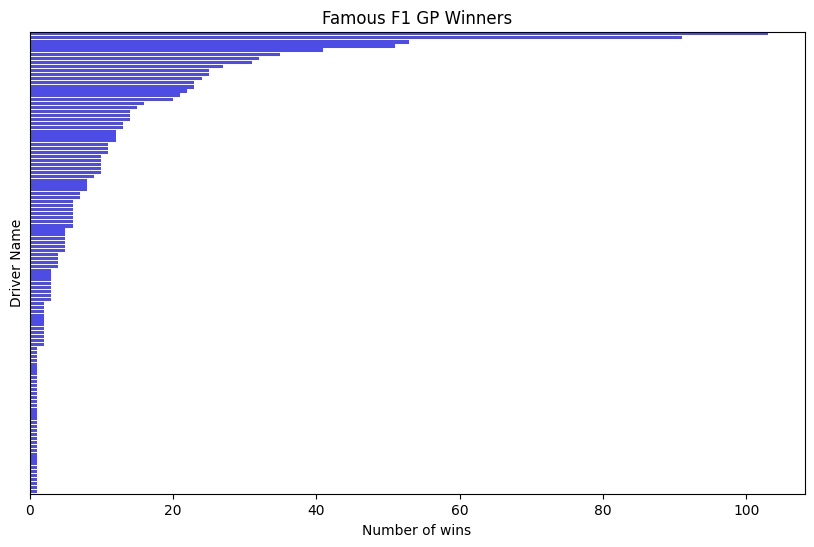

In [26]:
## Grand Prix Winners
gp_winner = df.loc[df['positionOrder'] ==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

## Barplot
sns.barplot(data = gp_winner, y = 'driver', x = 'positionOrder', color ='blue', alpha = 0.8)
plt.title('Famous F1 GP Winners')
plt.ylabel('Driver Name')
plt.xlabel('Number of wins')
plt.yticks([])

In [25]:
# Dataframe for the top 10 gp winners
top10Drivers = gp_winner.head(10)

print(top10Drivers)

               driver  positionOrder
0            hamilton            103
1  michael_schumacher             91
2              vettel             53
3               prost             51
4               senna             41
5      max_verstappen             35
6              alonso             32
7             mansell             31
8             stewart             27
9               clark             25


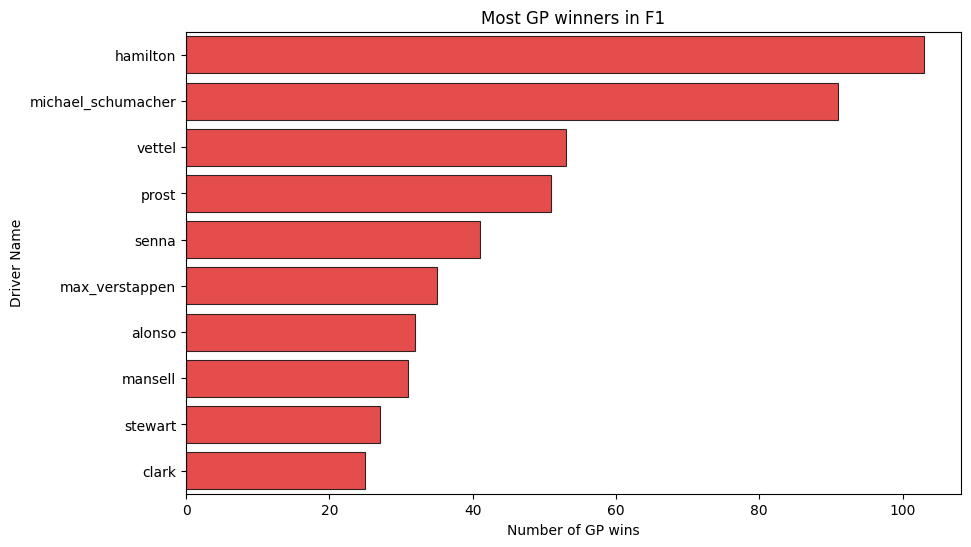

In [28]:
sns.barplot(data = top10Drivers, y = 'driver', x ='positionOrder', color = 'red', alpha = 0.8, linewidth = .8, edgecolor = 'black')
plt.title('Most GP winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins');

In [35]:
gpc_winners = df.loc[df['positionOrder'] ==1].groupby('constuctor_name')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()

top10Constructors = gpc_winners.head(10)
print(top10Constructors)

  constuctor_name  positionOrder
0         Ferrari            243
1         McLaren            179
2        Mercedes            125
3        Williams            114
4        Red Bull             92
5      Team Lotus             45
6         Renault             35
7        Benetton             27
8         Brabham             23
9         Tyrrell             23


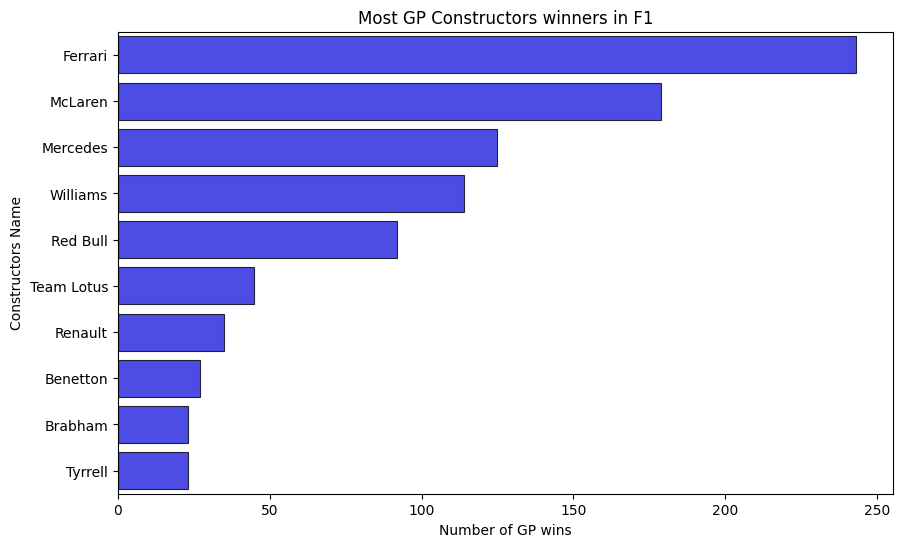

In [37]:
sns.barplot(data = top10Constructors, y = 'constuctor_name', x ='positionOrder', color = 'blue', alpha = 0.8, linewidth = .8, edgecolor = 'black')
plt.title('Most GP Constructors winners in F1')
plt.ylabel('Constructors Name')
plt.xlabel('Number of GP wins');

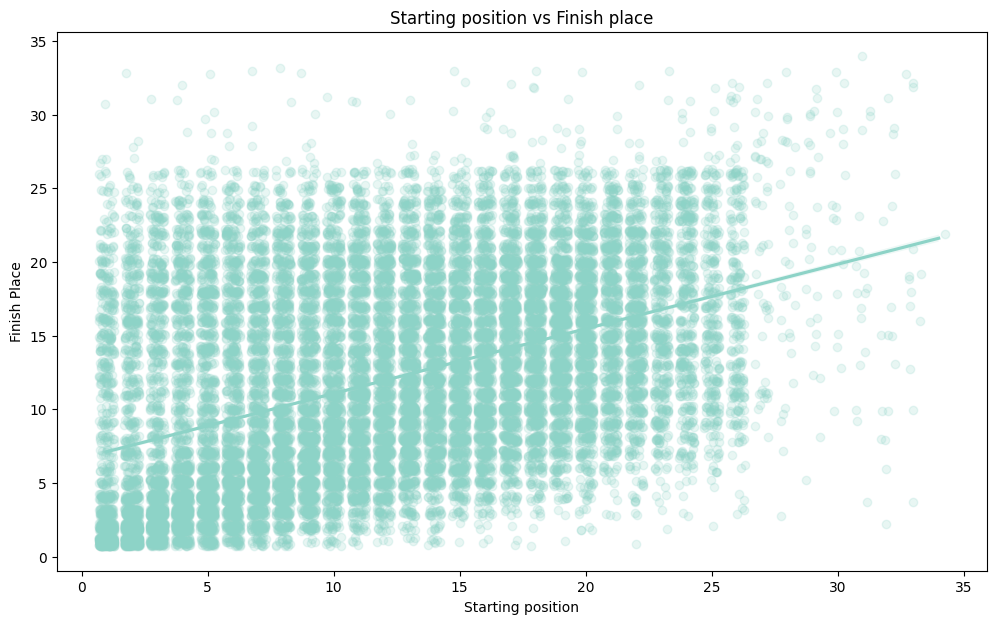

In [39]:
df_no_zero = df[df['grid'] != 0]

#Create a Plot
plt.figure(figsize = [12, 7])
sns.regplot(data = df_no_zero, x = 'grid', y = 'positionOrder', x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha' :1/5});
plt.title('Starting position vs Finish place')
plt.ylabel('Finish Place')
plt.xlabel('Starting position');

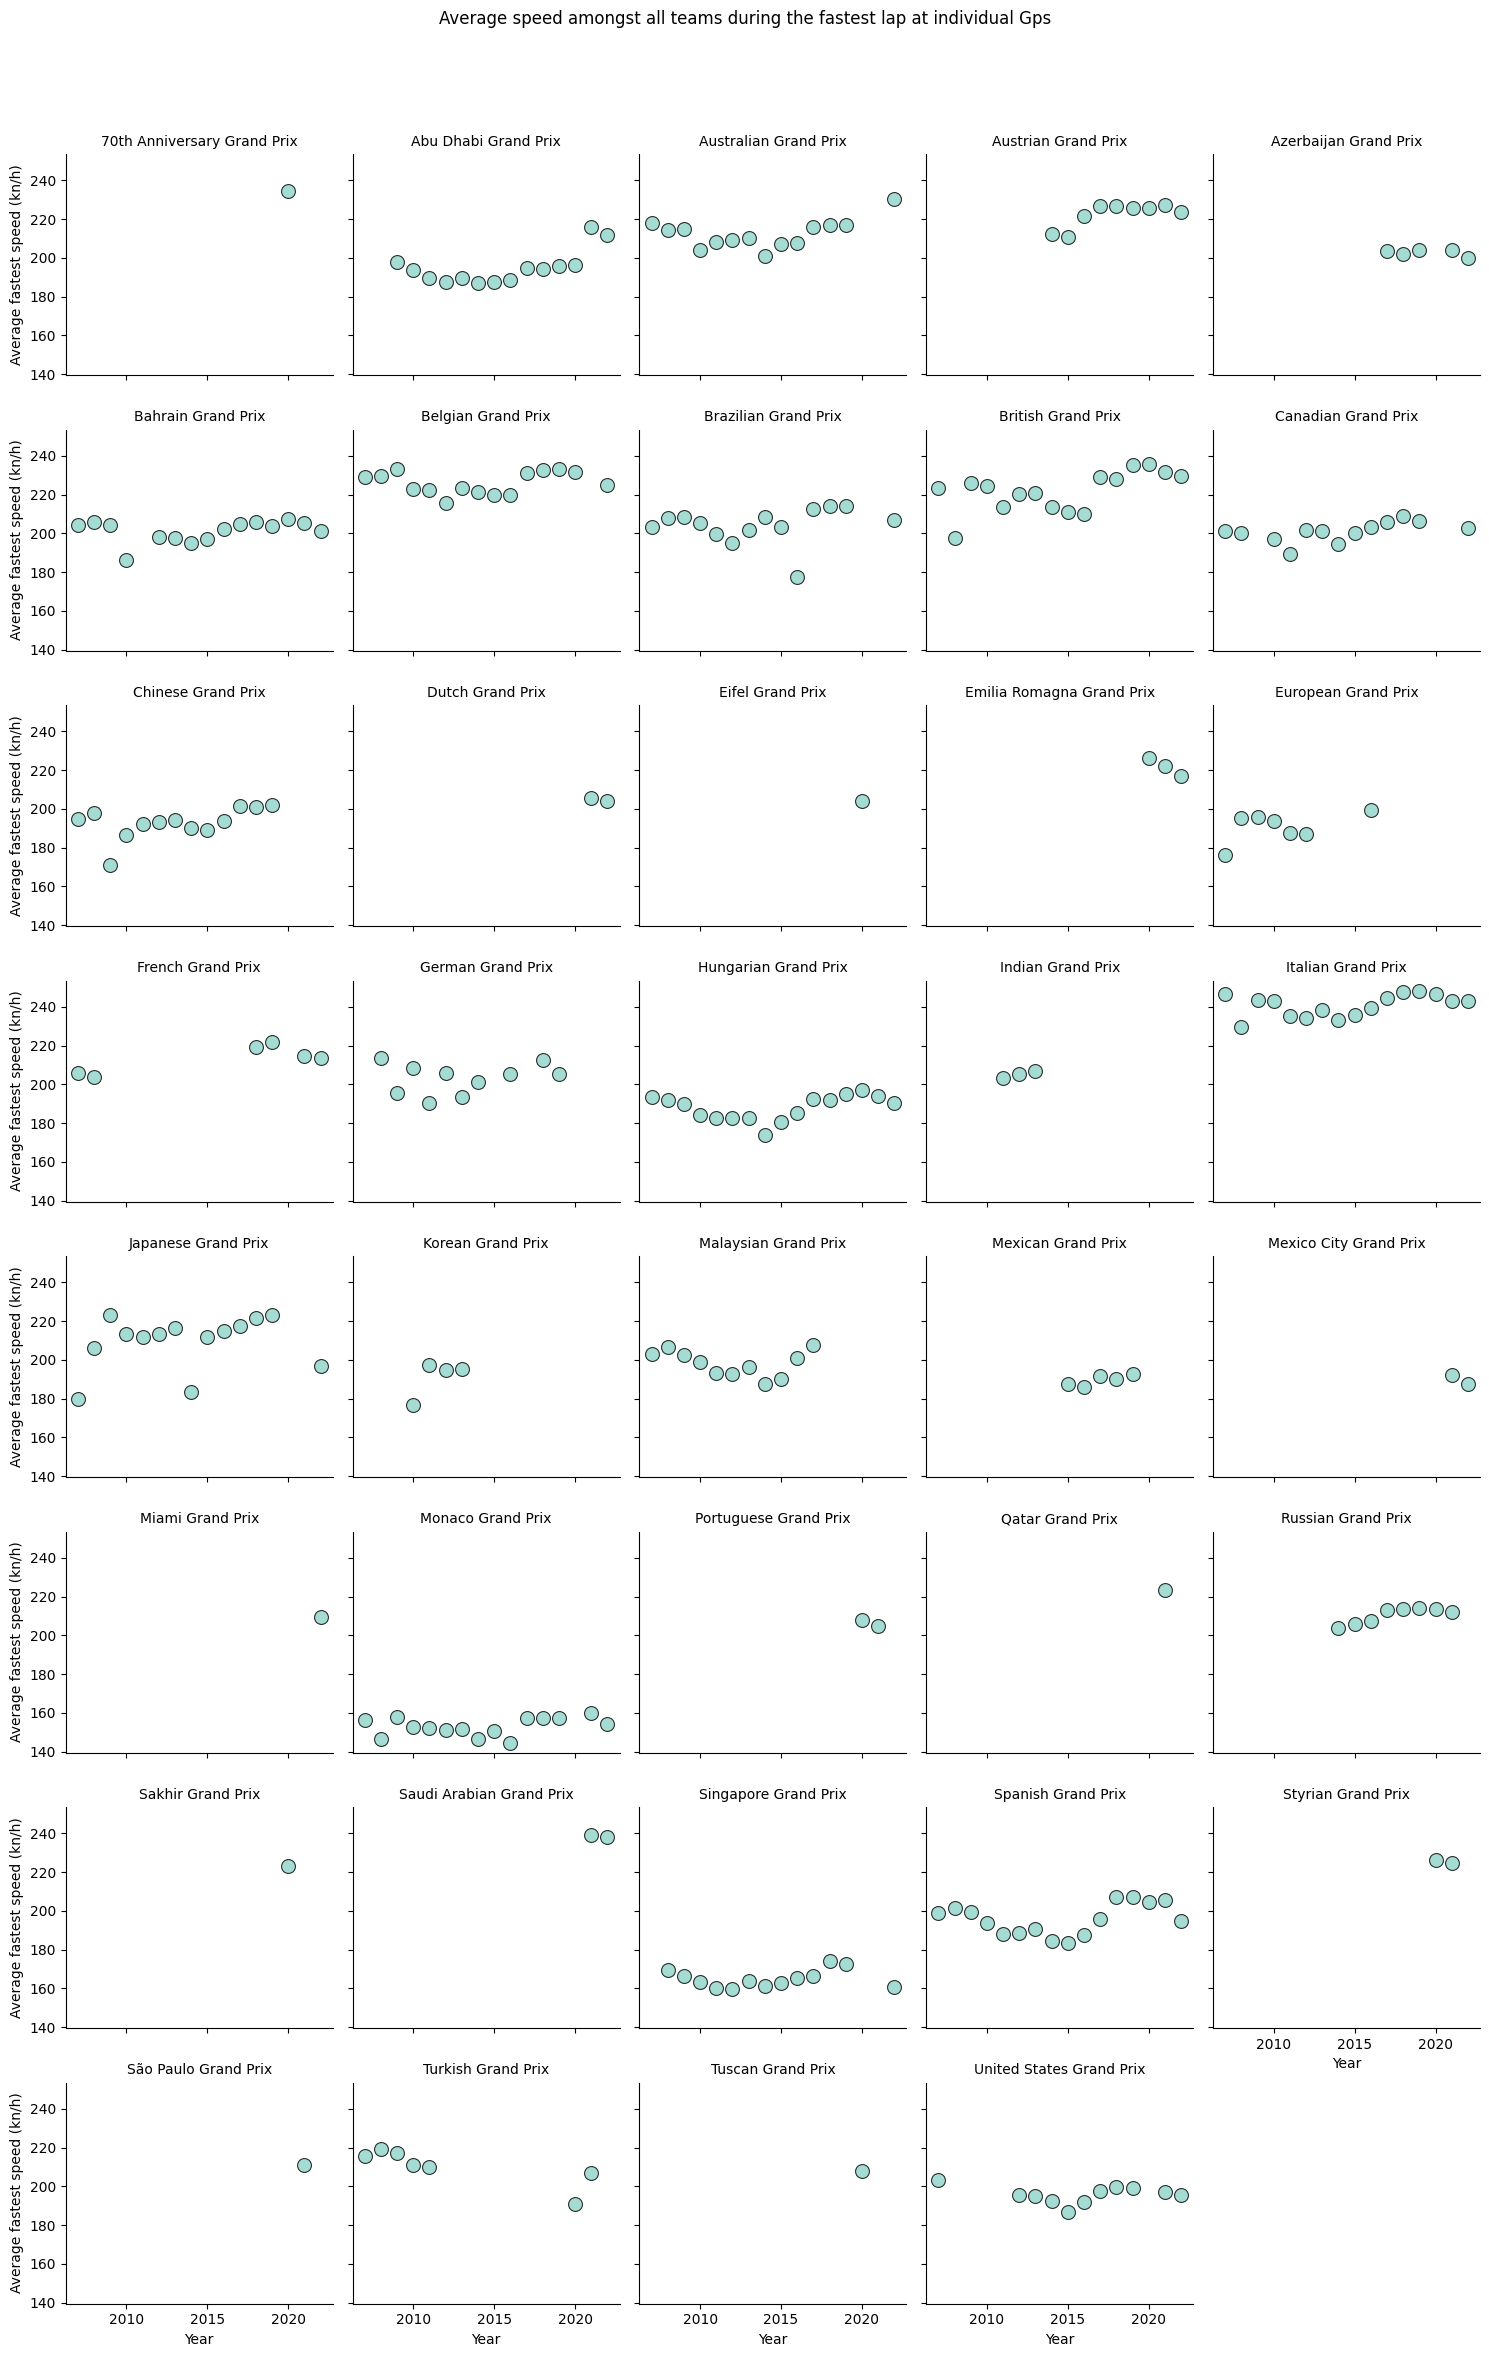

In [43]:
## 2007 season onwards

df_speed = df[df['year'] >=2007]
df_group_speed = df_speed.groupby(['gp_name', 'year'])['fastestLapSpeed'].mean().to_frame().reset_index()

# Creaye a facetgrid
g =sns.FacetGrid(data = df_group_speed, col = 'gp_name', col_wrap = 5)
g.map(plt.scatter, 'year', 'fastestLapSpeed', alpha = 0.8, linewidth=.8, edgecolor="black", s=100)
g.set_titles("{col_name}")
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (kn/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at individual Gps');